In [43]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf

In [44]:
# function to save to csv
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    df = web.DataReader(ticker, 'yahoo', start, end)
    
    df.to_csv('C:/Users/civic/' + ticker + '.csv')
    
    return df 
    
        

In [84]:
# Function that returns dataframe from the csv
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv('C:/Users/civic/' + ticker + '.csv')
    except FileNotFoundError:
            print('File Does Not Exist')
    else: 
        return(df)
        

In [51]:
# Add daily return to df
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price or EP/BP - 1
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv('C:/Users/civic/' + ticker + '.csv')
    return df

In [57]:
# Returns total return over time
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    daily_ret = df.loc[mask]['daily_return'].mean()
    df2 = df.loc[mask]
    days = df2.shape[0]
    return (days * daily_ret)

In [63]:
# Matplotlib Finance
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    try:
        df = pd.read_csv('C:/Users/civic/' + ticker + '.csv')
    except FileNotFoundError:
            print('File Does Not Exist')
    else: 
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        mpf.plot(df_sub, type='candle')
        mpf.plot(df_sub, type='line')
        mpf.plot(df_sub, type='ohlc', mav=4) #moving avg
        
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size' : 8})
        fig = mpf.figure(figsize=(12,8), style=s)
        ax = fig.add_subplot(2,1,2)
        av = fig.add_subplot(2,1,2, sharex = ax)
        mpf.plot(df_sub, type=chart_type, mav=(3, 5, 7), ax=ax, volume=av, show_nontrading=True)

In [66]:
# Simple Price Plot
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    try:
        df = pd.read_csv('C:/Users/civic/' + ticker + '.csv')
    except FileNotFoundError:
            print('File Does Not Exist')
    else: 
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        df_np = df_sub.to_numpy() #convert to numpy array
        np_adj_close = df_np[:,5]
        date_arr = df_np[:,1]
        fig = plt.figure(figsize=(12,8), dpi=100)
        axes = fig.add_axes([0,0,1,1])
        axes.plot(date_arr, np_adj_close, color='navy')
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        axes.set_facecolor('#FAEBD7')
        

In [68]:
# Download multiple stocks
def download_mulitiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

In [71]:
# Merge multiple stocks in one df by col_name
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    mult_df = pd.DataFrame()
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
    return mult_df

In [78]:
# Get Changing value of investment using multiple stocks
def plot_return_mult_stocks(invest, stock_df):
    (stock_df / stock_df.iloc[0] * invest).plot(figsize=(15,6))

In [80]:
# Get standard deviation for mult. stocks
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [81]:
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard Deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation : {}\n".format(cov))

Total Return:  0.02279238710497189
Stock: FB   Mean:  321.17 Standard Deviation: 34.85
Coefficient of Variation : 0.10852321611594554

Stock: AMZN Mean: 3343.87 Standard Deviation: 160.04
Coefficient of Variation : 0.047861341926550297

Stock: AAPL Mean:  140.43 Standard Deviation: 14.82
Coefficient of Variation : 0.10554703804065858

Stock: NFLX Mean:  558.22 Standard Deviation: 56.00
Coefficient of Variation : 0.10032351592125217

Stock: GOOG Mean: 2510.61 Standard Deviation: 367.30
Coefficient of Variation : 0.14630045088746974



,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2021-01-04,268.940002,3186.629883,128.453430,522.859985,1728.239990
2021-01-05,270.970001,3218.510010,130.041595,520.799988,1740.920044
2021-01-06,263.309998,3138.379883,125.664207,500.489990,1735.290039
2021-01-07,268.739990,3162.159912,129.952271,508.890015,1787.250000
2021-01-08,267.570007,3182.699951,131.073929,510.399994,1807.209961
...,...,...,...,...,...
2021-12-27,346.179993,3393.389893,180.100540,613.119995,2961.280029
2021-12-28,346.220001,3413.219971,179.061859,610.710022,2928.959961
2021-12-29,342.940002,3384.020020,179.151749,610.539978,2930.090088


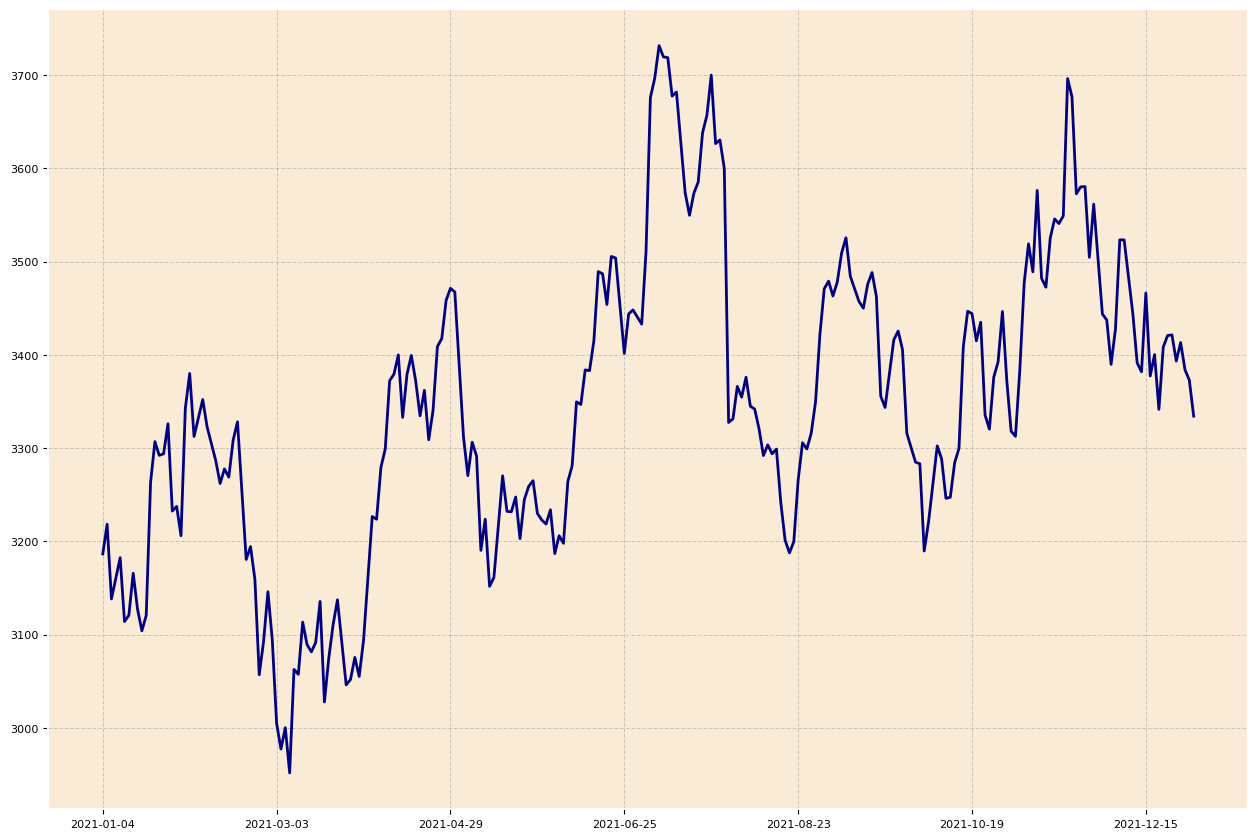

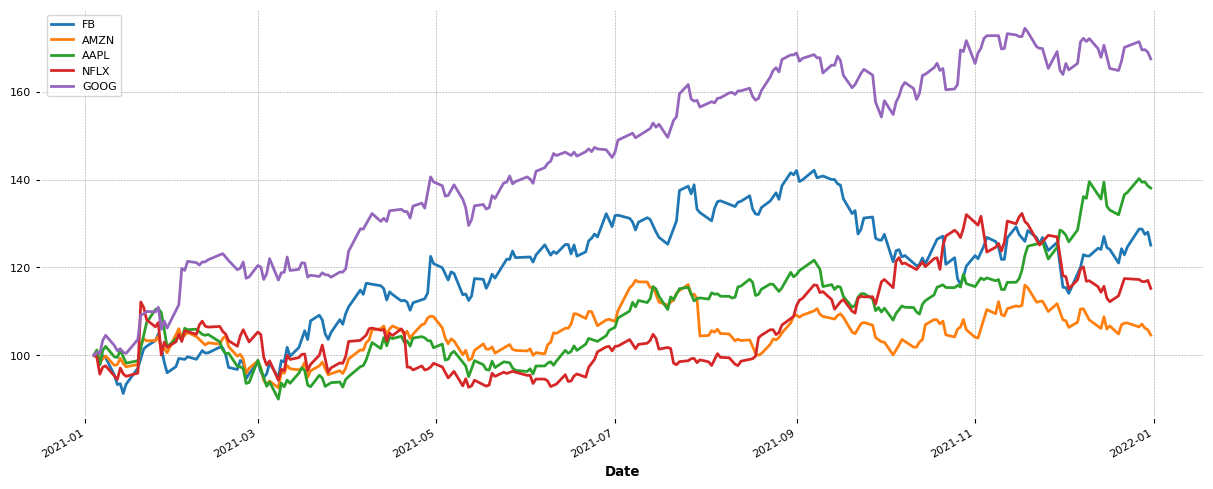

In [83]:
# Test Function
save_to_csv_from_yahoo('AMZN', 2021, 1, 1, 2022, 1, 1)

AMZN = get_df_from_csv('AMZN')

add_daily_return_to_df(AMZN, 'AMZN')

AMZN
tot_ret = get_return_defined_time(AMZN, 2021, 1, 1, 2022, 1, 1)
print("Total Return: ", tot_ret)

# mplfinance_plot('AMZN', 'ohlc', 2021, 1, 1, 2022, 1, 1)
price_plot('AMZN', 2021, 1, 1, 2022, 1, 1)


tickers = ['FB', 'AAPL', 'NFLX', 'GOOG']

#download_mulitiple_stocks(2021, 1, 1, 2022, 1, 1, *tickers)

tickers = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
mult_df = merge_df_by_column_name('Adj Close', 2021, 1, 1, 2022, 1, 1, *tickers)
plot_return_mult_stocks(100, mult_df)

get_mult_stock_mean_sd(mult_df)
mult_df
# for dates 2021, 1, 1, 2022, 1, 1: AMZN is less risky due according to lower COV

In [50]:
# Test read csv
AMZN = get_df_from_csv('AMZN')
AMZN

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-04,3272.000000,3144.020020,3270.000000,3186.629883,4411400,3186.629883
1,2021-01-05,3223.379883,3165.060059,3166.010010,3218.510010,2655500,3218.510010
2,2021-01-06,3197.510010,3131.159912,3146.479980,3138.379883,4394800,3138.379883
3,2021-01-07,3208.540039,3155.000000,3157.000000,3162.159912,3514500,3162.159912
4,2021-01-08,3190.639893,3142.199951,3180.000000,3182.699951,3537700,3182.699951
...,...,...,...,...,...,...,...
247,2021-12-27,3458.860107,3384.310059,3420.739990,3393.389893,2934400,3393.389893
248,2021-12-28,3443.520020,3382.709961,3403.649902,3413.219971,2731900,3413.219971
249,2021-12-29,3424.239990,3372.010010,3416.800049,3384.020020,1787700,3384.020020
250,2021-12-30,3417.760010,3370.479980,3394.000000,3372.889893,1879200,3372.889893
